<a href="https://colab.research.google.com/github/shoreey/Predicting-Natural-Disaster-with-Computer-Vision/blob/main/Predicting_Natural_Disaster_With_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Natural Disaster

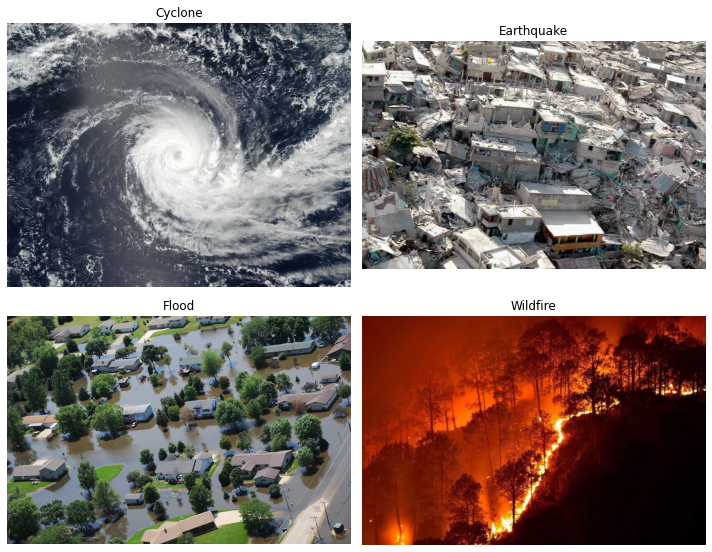

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the directory path
dir_path = r"E:\Cyclone_Wildfire_Flood_Earthquake_Database"

# Get a list of subfolders
subfolders = [f.path for f in os.scandir(dir_path) if f.is_dir()]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel() # Flatten the axes array

# Loop through each subfolder and plot the first image
for i, subfolder in enumerate(subfolders):
    # Get a list of files in the subfolder
    files = [f.path for f in os.scandir(subfolder) if f.is_file()]

    # If there are files in the subfolder
    if files:
        # Get the first file path
        first_file = files[0]

        # Open and plot the first image
        image = Image.open(first_file)
        axes[i].imshow(image)
        axes[i].set_title(os.path.basename(subfolder))
        axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Found 3544 images belonging to 4 classes.
Found 884 images belonging to 4 classes.
17225924/17225924 [==============================] - 3s 0us/step
Epoch 1/10
110/110 [==============================] - 355s 3s/step - loss: 1.1621 - accuracy: 0.4775 - val_loss: 1.1397 - val_accuracy: 0.4850
Epoch 2/10
110/110 [==============================] - 312s 3s/step - loss: 1.0606 - accuracy: 0.5441 - val_loss: 1.0798 - val_accuracy: 0.5509
Epoch 3/10
110/110 [==============================] - 360s 3s/step - loss: 1.0107 - accuracy: 0.5695 - val_loss: 1.0183 - val_accuracy: 0.5220
Epoch 4/10
110/110 [==============================] - 350s 3s/step - loss: 0.9763 - accuracy: 0.5874 - val_loss: 1.0104 - val_accuracy: 0.5544
Epoch 5/10
110/110 [==============================] - 346s 3s/step - loss: 0.9729 - accuracy: 0.5871 - val_loss: 0.9821 - val_accuracy: 0.5764
Epoch 6/10
110/110 [==============================] - 324s 3s/step - loss: 0.9365 - accuracy: 0.6096 - val_loss: 0.9586 - val_accuracy: 0

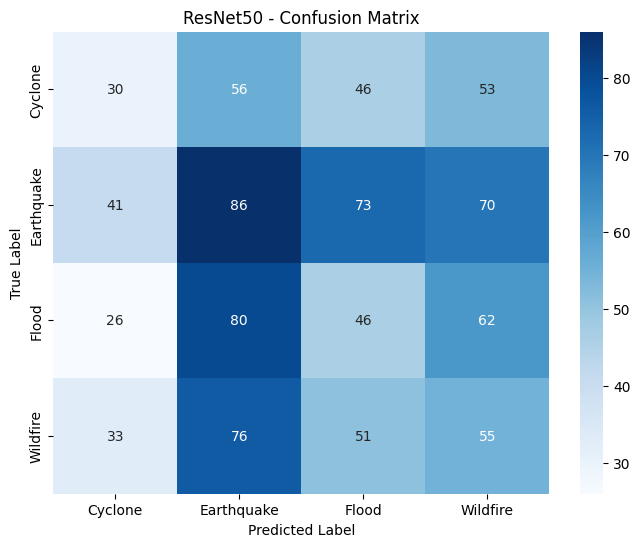

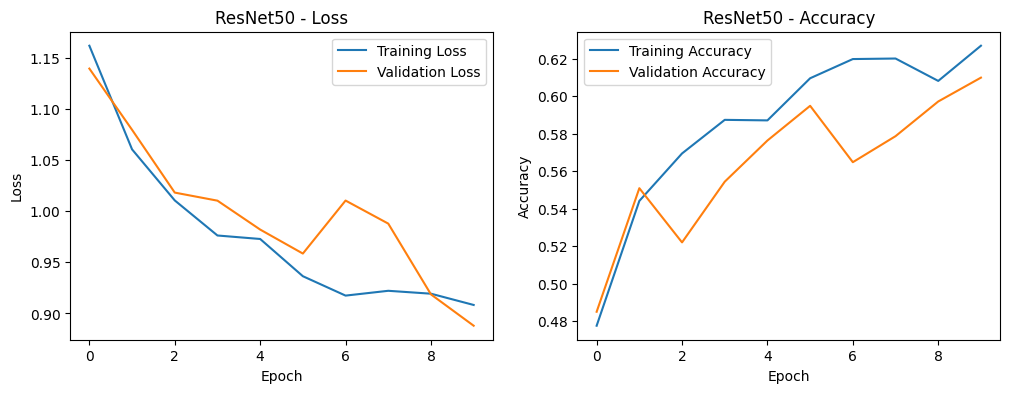

Epoch 1/10
110/110 [==============================] - 693s 6s/step - loss: 0.6701 - accuracy: 0.7546 - val_loss: 0.5357 - val_accuracy: 0.7847
Epoch 2/10
110/110 [==============================] - 684s 6s/step - loss: 0.4111 - accuracy: 0.8522 - val_loss: 0.4371 - val_accuracy: 0.8322
Epoch 3/10
110/110 [==============================] - 680s 6s/step - loss: 0.3666 - accuracy: 0.8707 - val_loss: 0.3773 - val_accuracy: 0.8623
Epoch 4/10
110/110 [==============================] - 675s 6s/step - loss: 0.3281 - accuracy: 0.8798 - val_loss: 0.4357 - val_accuracy: 0.8472
Epoch 5/10
110/110 [==============================] - 673s 6s/step - loss: 0.3127 - accuracy: 0.8921 - val_loss: 0.3778 - val_accuracy: 0.8669
Epoch 6/10
110/110 [==============================] - 699s 6s/step - loss: 0.2849 - accuracy: 0.8998 - val_loss: 0.3373 - val_accuracy: 0.8854
Epoch 7/10
110/110 [==============================] - 711s 6s/step - loss: 0.2901 - accuracy: 0.8969 - val_loss: 0.3152 - val_accuracy: 0.8912

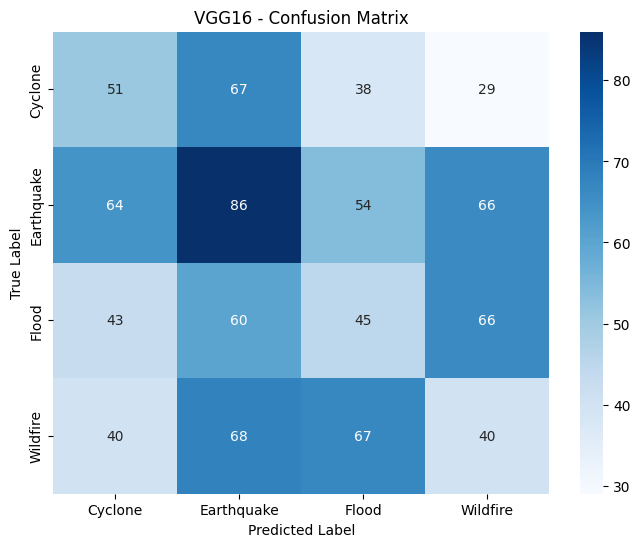

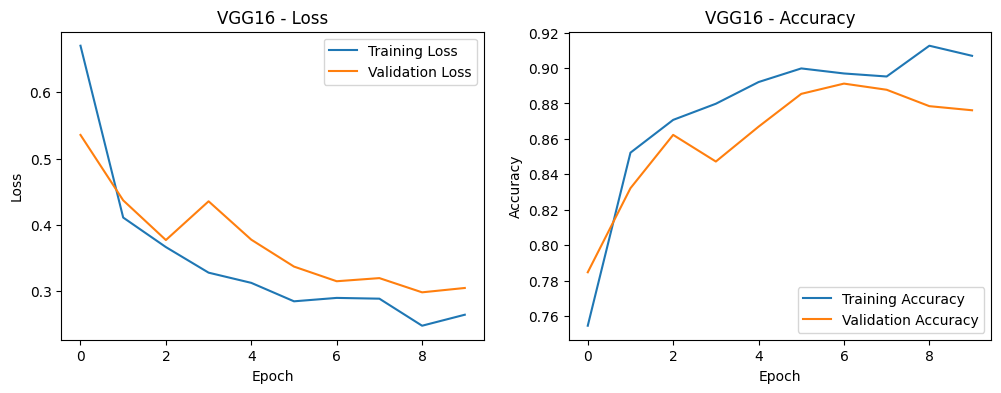

Epoch 1/10
110/110 [==============================] - 123s 1s/step - loss: 0.2931 - accuracy: 0.8932 - val_loss: 0.3743 - val_accuracy: 0.8576
Epoch 2/10
110/110 [==============================] - 119s 1s/step - loss: 0.1670 - accuracy: 0.9402 - val_loss: 0.1772 - val_accuracy: 0.9352
Epoch 3/10
110/110 [==============================] - 122s 1s/step - loss: 0.1437 - accuracy: 0.9516 - val_loss: 0.1610 - val_accuracy: 0.9317
Epoch 4/10
110/110 [==============================] - 133s 1s/step - loss: 0.1225 - accuracy: 0.9562 - val_loss: 0.1523 - val_accuracy: 0.9444
Epoch 5/10
110/110 [==============================] - 135s 1s/step - loss: 0.1012 - accuracy: 0.9655 - val_loss: 0.1685 - val_accuracy: 0.9329
Epoch 6/10
110/110 [==============================] - 137s 1s/step - loss: 0.1127 - accuracy: 0.9584 - val_loss: 0.1459 - val_accuracy: 0.9514
Epoch 7/10
110/110 [==============================] - 137s 1s/step - loss: 0.0840 - accuracy: 0.9704 - val_loss: 0.1219 - val_accuracy: 0.9549

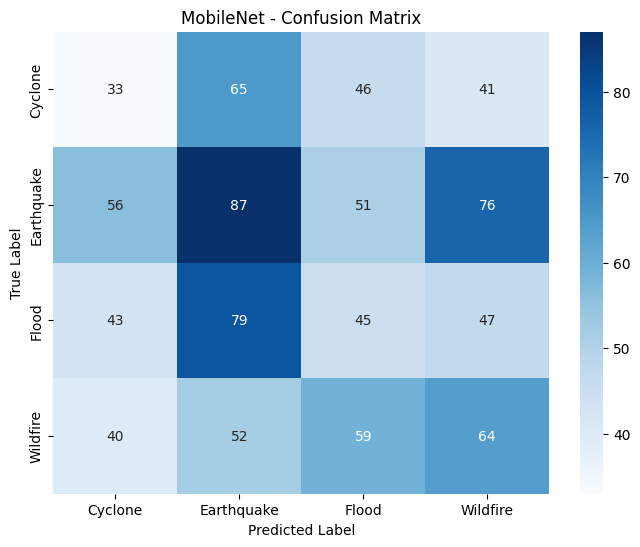

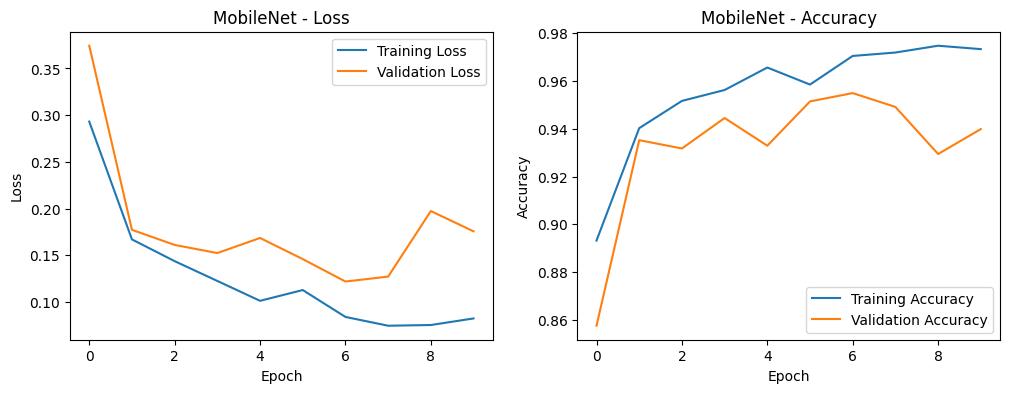

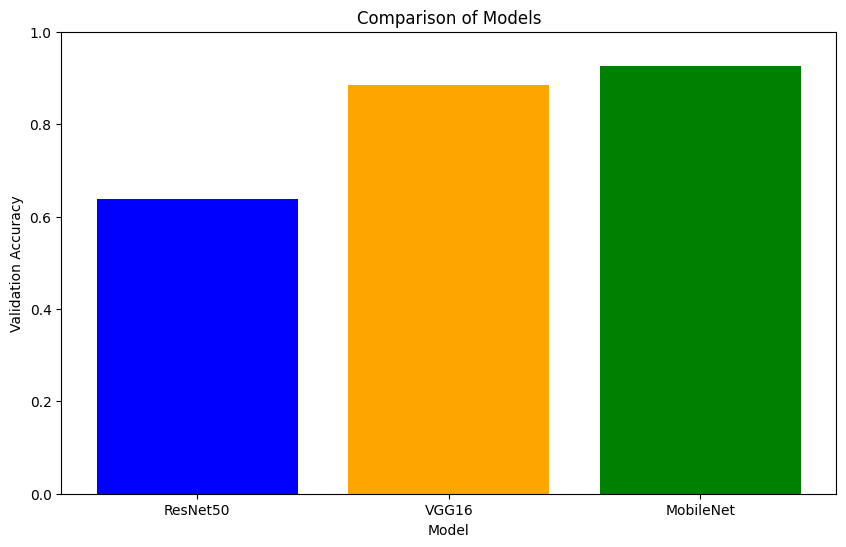

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

# Define paths to your image directory
base_dir = "E:/DATASET/Cyclone_Wildfire_Flood_Earthquake_Database"

# Parameters
batch_size = 32
image_size = (224, 224)  # Target size for resizing images
validation_split = 0.2  # 20% of the data will be used for validation
test_split = 0.1  # 10% of the data will be used for testing

# Preprocess and augment data
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split
)

# Load and preprocess data
all_data_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Use all data for training
    shuffle=True
)

validation_data_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

# Define models
models = {
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "MobileNet": MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Train and evaluate models
results = {}
for model_name, base_model in models.items():
    # Freeze pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(len(all_data_generator.class_indices), activation='softmax')(x)

    # Combine base model and custom head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(
        all_data_generator,
        steps_per_epoch=all_data_generator.samples // batch_size,
        epochs=10,
        validation_data=validation_data_generator,
        validation_steps=validation_data_generator.samples // batch_size
    )

    # Evaluate model
    loss, accuracy = model.evaluate(validation_data_generator)
    print(f"{model_name} - Validation Accuracy: {accuracy}, Validation Loss: {loss}")

    # Save results
    results[model_name] = {
        "history": history,
        "loss": loss,
        "accuracy": accuracy
    }

    # Plot confusion matrix
    predictions = model.predict(validation_data_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = validation_data_generator.classes
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_data_generator.class_indices.keys(),
                yticklabels=validation_data_generator.class_indices.keys())
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot validation loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} - Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot comparison of models
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [result['accuracy'] for result in results.values()], color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Models')
plt.ylim(0, 1)
plt.show()


# Hyper parameter tuining

Found 3544 images belonging to 4 classes.
Found 884 images belonging to 4 classes.
Epoch 1/10
110/110 [==============================] - 296s 3s/step - loss: 1.1832 - accuracy: 0.4892 - val_loss: 1.1040 - val_accuracy: 0.5023
Epoch 2/10
110/110 [==============================] - 294s 3s/step - loss: 1.0545 - accuracy: 0.5330 - val_loss: 1.0341 - val_accuracy: 0.5532
Epoch 3/10
110/110 [==============================] - 296s 3s/step - loss: 1.0089 - accuracy: 0.5794 - val_loss: 1.0752 - val_accuracy: 0.5127
Epoch 4/10
110/110 [==============================] - 293s 3s/step - loss: 1.0051 - accuracy: 0.5703 - val_loss: 1.0254 - val_accuracy: 0.5370
Epoch 5/10
110/110 [==============================] - 292s 3s/step - loss: 0.9663 - accuracy: 0.5914 - val_loss: 1.0227 - val_accuracy: 0.5683
Epoch 6/10
110/110 [==============================] - 292s 3s/step - loss: 0.9504 - accuracy: 0.5937 - val_loss: 0.9295 - val_accuracy: 0.5972
Epoch 7/10
110/110 [==============================] - 290s 

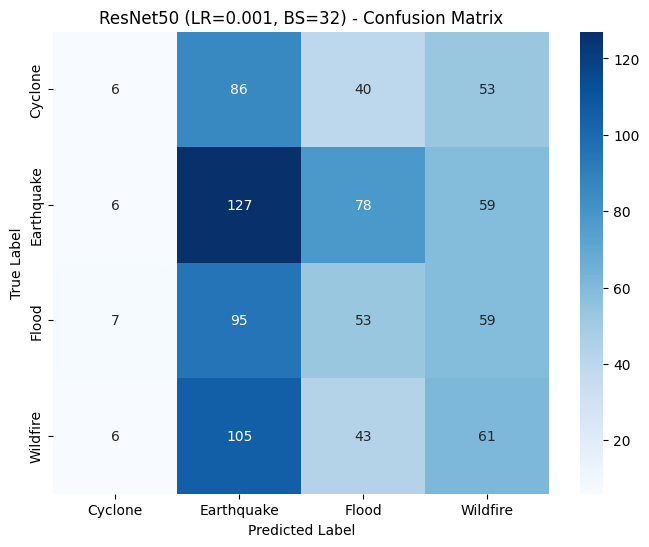

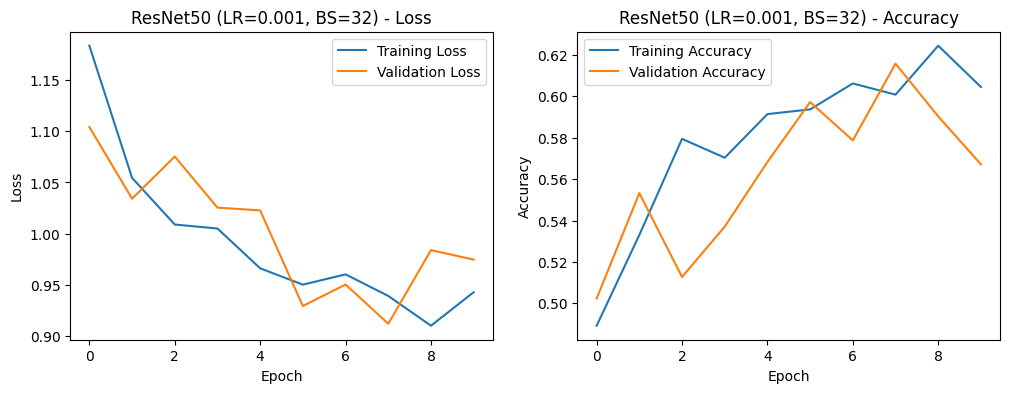

Epoch 1/10
55/55 [==============================] - 159s 3s/step - loss: 1.2621 - accuracy: 0.4301 - val_loss: 1.1390 - val_accuracy: 0.4904
Epoch 2/10
55/55 [==============================] - 153s 3s/step - loss: 1.1179 - accuracy: 0.5034 - val_loss: 1.2066 - val_accuracy: 0.4784
Epoch 3/10
55/55 [==============================] - 154s 3s/step - loss: 1.0255 - accuracy: 0.5591 - val_loss: 1.0840 - val_accuracy: 0.5072
Epoch 4/10
55/55 [==============================] - 151s 3s/step - loss: 1.0183 - accuracy: 0.5702 - val_loss: 1.1608 - val_accuracy: 0.5144
Epoch 5/10
55/55 [==============================] - 151s 3s/step - loss: 1.0335 - accuracy: 0.5594 - val_loss: 1.0125 - val_accuracy: 0.5769
Epoch 6/10
55/55 [==============================] - 151s 3s/step - loss: 1.0173 - accuracy: 0.5699 - val_loss: 1.0061 - val_accuracy: 0.5769
Epoch 7/10
55/55 [==============================] - 159s 3s/step - loss: 0.9908 - accuracy: 0.5759 - val_loss: 0.9391 - val_accuracy: 0.5938
Epoch 8/10
55

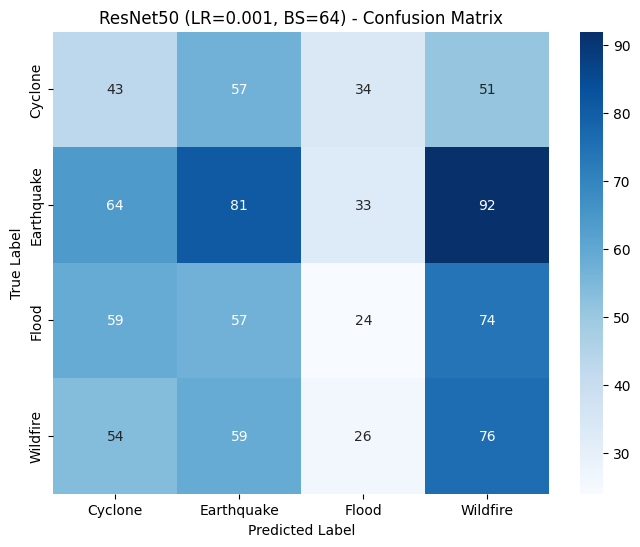

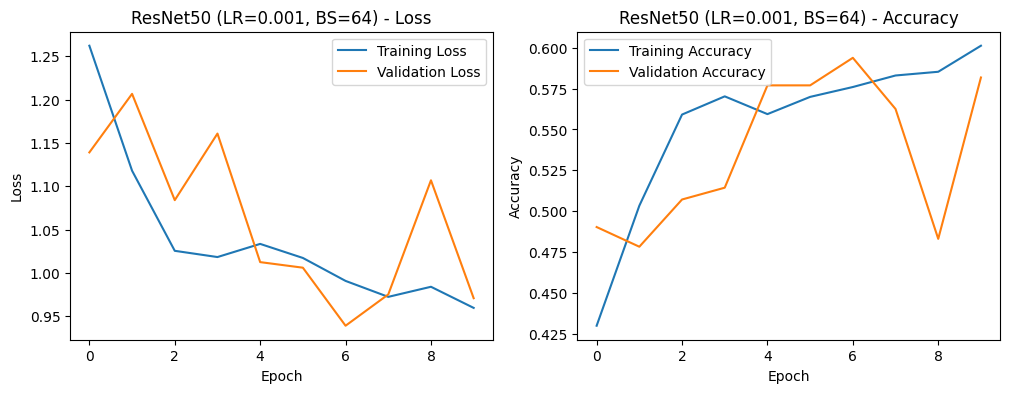

Epoch 1/10
110/110 [==============================] - 322s 3s/step - loss: 1.2331 - accuracy: 0.4593 - val_loss: 1.1671 - val_accuracy: 0.5035
Epoch 2/10
110/110 [==============================] - 309s 3s/step - loss: 1.1217 - accuracy: 0.5214 - val_loss: 1.1329 - val_accuracy: 0.5035
Epoch 3/10
110/110 [==============================] - 309s 3s/step - loss: 1.0706 - accuracy: 0.5404 - val_loss: 1.1366 - val_accuracy: 0.5069
Epoch 4/10
110/110 [==============================] - 324s 3s/step - loss: 1.0524 - accuracy: 0.5530 - val_loss: 1.0844 - val_accuracy: 0.5058
Epoch 5/10
110/110 [==============================] - 316s 3s/step - loss: 1.0358 - accuracy: 0.5544 - val_loss: 1.1208 - val_accuracy: 0.4653
Epoch 6/10
110/110 [==============================] - 318s 3s/step - loss: 1.0211 - accuracy: 0.5609 - val_loss: 1.0504 - val_accuracy: 0.5382
Epoch 7/10
110/110 [==============================] - 320s 3s/step - loss: 1.0090 - accuracy: 0.5735 - val_loss: 1.0500 - val_accuracy: 0.5255

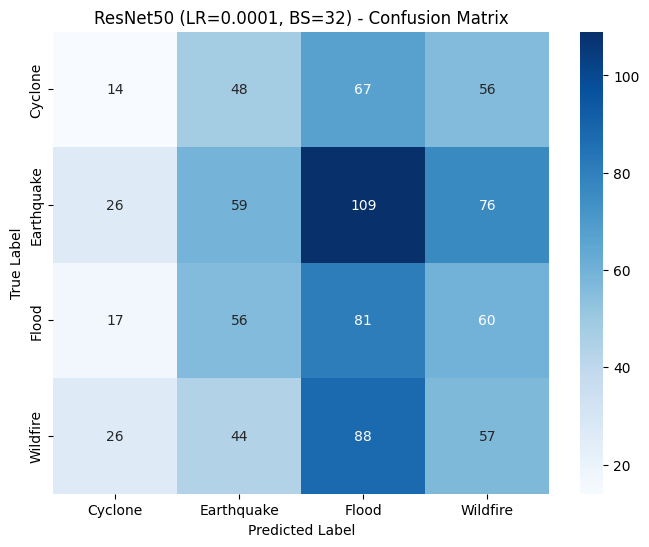

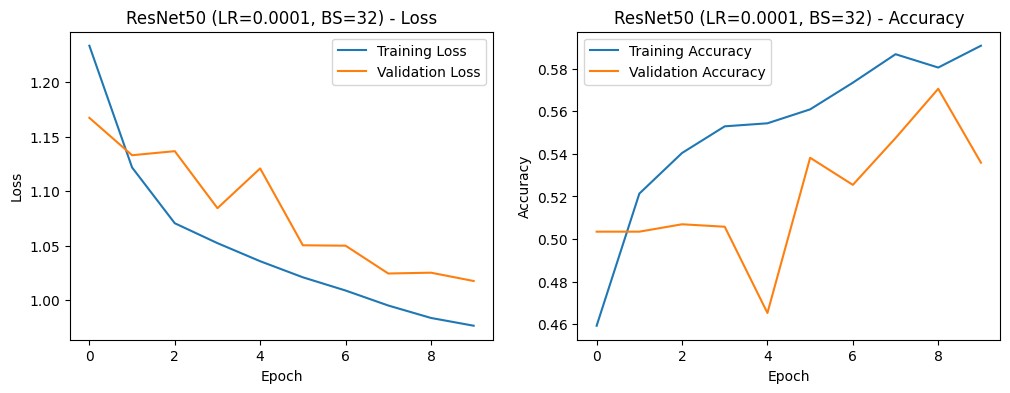

Epoch 1/10
55/55 [==============================] - 178s 3s/step - loss: 1.3669 - accuracy: 0.3716 - val_loss: 1.2408 - val_accuracy: 0.5000
Epoch 2/10
55/55 [==============================] - 180s 3s/step - loss: 1.2061 - accuracy: 0.5029 - val_loss: 1.1832 - val_accuracy: 0.4856
Epoch 3/10
55/55 [==============================] - 176s 3s/step - loss: 1.1502 - accuracy: 0.5274 - val_loss: 1.1657 - val_accuracy: 0.4784
Epoch 4/10
55/55 [==============================] - 184s 3s/step - loss: 1.1077 - accuracy: 0.5211 - val_loss: 1.1215 - val_accuracy: 0.5120
Epoch 5/10
55/55 [==============================] - 161s 3s/step - loss: 1.1044 - accuracy: 0.5347 - val_loss: 1.1395 - val_accuracy: 0.5000
Epoch 6/10
55/55 [==============================] - 159s 3s/step - loss: 1.0850 - accuracy: 0.5188 - val_loss: 1.1181 - val_accuracy: 0.5288
Epoch 7/10
55/55 [==============================] - 161s 3s/step - loss: 1.0651 - accuracy: 0.5382 - val_loss: 1.1101 - val_accuracy: 0.5144
Epoch 8/10
55

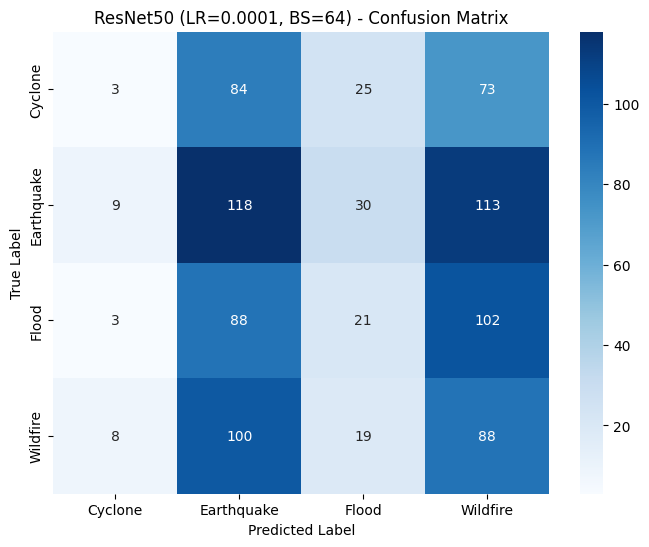

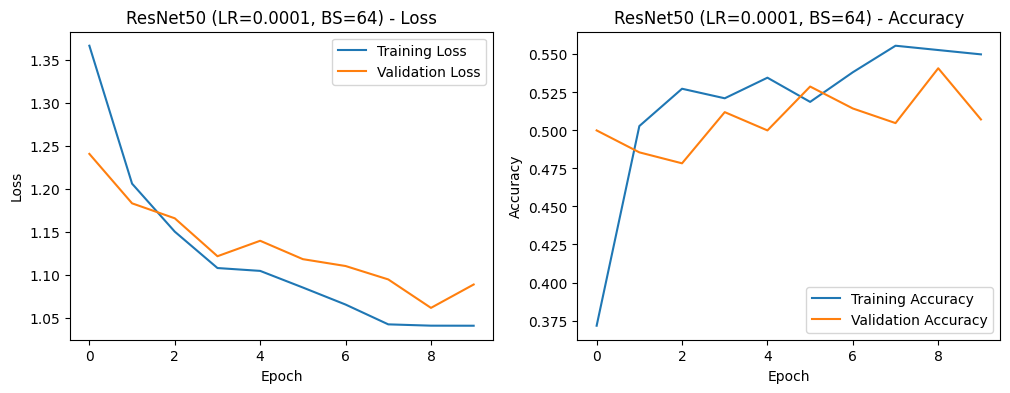

Epoch 1/10
  5/110 [>.............................] - ETA: 9:35 - loss: 1.3939 - accuracy: 0.2688

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define paths to your image directory
base_dir = "E:/DATASET/Cyclone_Wildfire_Flood_Earthquake_Database"

# Parameters
image_size = (224, 224)  # Target size for resizing images
validation_split = 0.2  # 20% of the data will be used for validation
test_split = 0.1  # 10% of the data will be used for testing

# Preprocess and augment data
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split
)

# Load and preprocess data
all_data_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Use all data for training
    shuffle=True
)

validation_data_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

# Define models
models = {
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "MobileNet": MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Hyperparameters
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]
epochs = 10

# Train and evaluate models with hyperparameter tuning
results = {}
for model_name, base_model in models.items():
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            # Freeze pre-trained layers
            for layer in base_model.layers:
                layer.trainable = False

            # Add custom classification head
            x = base_model.output
            x = GlobalAveragePooling2D()(x)
            x = Dense(512, activation='relu')(x)
            predictions = Dense(len(all_data_generator.class_indices), activation='softmax')(x)

            # Combine base model and custom head
            model = Model(inputs=base_model.input, outputs=predictions)

            # Compile model
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            # Train model
            history = model.fit(
                all_data_generator,
                steps_per_epoch=all_data_generator.samples // batch_size,
                epochs=epochs,
                validation_data=validation_data_generator,
                validation_steps=validation_data_generator.samples // batch_size
            )

            # Evaluate model
            loss, accuracy = model.evaluate(validation_data_generator)
            print(f"{model_name} (LR={learning_rate}, BS={batch_size}) - Validation Accuracy: {accuracy}, Validation Loss: {loss}")

            # Save results
            results[f"{model_name} (LR={learning_rate}, BS={batch_size})"] = {
                "history": history,
                "loss": loss,
                "accuracy": accuracy
            }

            # Plot confusion matrix
            predictions = model.predict(validation_data_generator)
            y_pred = np.argmax(predictions, axis=1)
            y_true = validation_data_generator.classes
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_data_generator.class_indices.keys(),
                        yticklabels=validation_data_generator.class_indices.keys())
            plt.title(f"{model_name} (LR={learning_rate}, BS={batch_size}) - Confusion Matrix")
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

            # Plot validation loss and accuracy
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f"{model_name} (LR={learning_rate}, BS={batch_size}) - Loss")
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title(f"{model_name} (LR={learning_rate}, BS={batch_size}) - Accuracy")
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()

# Plot comparison of models
plt.figure(figsize=(14, 6))
plt.bar(results.keys(), [result['accuracy'] for result in results.values()], color=['blue', 'orange', 'green'])
plt.xlabel('Model (Learning Rate, Batch Size)')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()
